# Twitter Sentiment Analysis
En este notebook vas a ver un ejemplo de los procesos necesarios para realizar un análisis de sentimientos sobre Tweets. Para ello tendremos que seguir los siguientes pasos:
1. Conseguir un Corpus: no es más que una base de datos de texto etiquetado
2. Limpiar los datos
3. Entrenar un modelo con el corpus
4. Atacar a la API de Twitter
5. Predecir los nuevos Tweets

**Estos programas son muy útiles en campañas de marketing, para monitorizar el lanzamiento de un nuevo producto, realizar seguimiento en Twitter de eventos, o simplemente tener monitorizadas ciertas cuentas o hashtags para tener un programa de análisis real time.**

## 1. Corpus
Para conseguir el corpus tendremos que registrarnos en la [página del TASS](http://tass.sepln.org/tass_data/download.php), que se trata de una asociación de análisis semántico que encargada de recopilar texto y mantenerlo etiquetado. 

Para datasets en ingles lo tenemos más fácil ya que con librerías como [TextBlob](https://textblob.readthedocs.io/en/dev/) podemos predecir directamente la polaridad del Tweet, con modelos ya preentrenados. En el caso del castellano necesitamos acudir a un corpus etiquetado para entrenar nuestro modelo.

Registrate en el TASS y accede a sus corpus a través de un link que te llegará al correo tras el registro.

![imagen](img/tass_register.png)


Una vez estes registrado, descárgate el corpus de tweets en español de entrenamiento. En este punto lo ideal es coger un corpus que se adapte lo máximo posible a los tipos de tweets que intentamos predecir, es decir, si queremos predecir tweets sobre política, procurar elegir un corpus que tenga vocabulario de política.

En este notebook se va a elegir un corpus genérico con no demasiados registros para aligerar la limpieza y entrenamiento de los modelos.

![imagen](img/download_train_spanish.png)

### Importamos librerias

In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

### Leemos el dataset

In [2]:
tree = ET.parse('data/general-train-tagged.xml')
root = tree.getroot()

In [3]:
raw_dict = {
    'User': [],
    'Content': [],
    'Date': [],
    'Lang': [],
    'Polarity': [],
    'Type': []
}

for i in root.iter('tweet'):
    user = i.find('user').text
    content = i.find('content').text
    date = i.find('date').text
    lang = i.find('lang').text
    polarity = i.find('sentiments').find('polarity').find('value').text
    tweet_type = i.find('sentiments').find('polarity').find('type').text
    
    raw_dict['User'].append(user)
    raw_dict['Content'].append(content)
    raw_dict['Date'].append(date)
    raw_dict['Lang'].append(lang)
    raw_dict['Polarity'].append(polarity)
    raw_dict['Type'].append(tweet_type)
    
df = pd.DataFrame(raw_dict)
print(df.shape)

df.head()

(7219, 6)


,User,Content,Date,Lang,Polarity,Type
0,ccifuentes,"Salgo de #VeoTV , que día más largoooooo...",2011-12-02T00:47:55,es,NONE,AGREEMENT
1,CarmendelRiego,@PauladeLasHeras No te libraras de ayudar me/n...,2011-12-02T00:49:40,es,NEU,DISAGREEMENT
2,CarmendelRiego,@marodriguezb Gracias MAR,2011-12-02T00:57:40,es,P,AGREEMENT
3,mgilguerrero,"Off pensando en el regalito Sinde, la que se v...",2011-12-02T02:33:37,es,N+,AGREEMENT
4,paurubio,Conozco a alguien q es adicto al drama! Ja ja ...,2011-12-02T02:59:03,es,P+,AGREEMENT


### Columna de polaridad

In [4]:
# Vemos los valores unicos de la columna de polaridad


array(['NONE', 'NEU', 'P', 'N+', 'P+', 'N'], dtype=object)

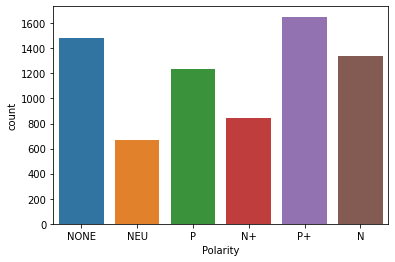

#### Columna de tipo

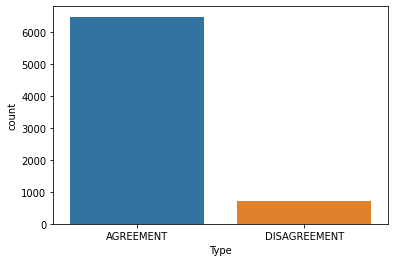

## 2. Limpieza de datos
#### Polaridad
Vamos a clasificar los Tweets como buenos o malos, por lo que haremos la siguiente agrupación de la polaridad

#### Idioma
Nos quedamos con los tweets en español. Si no tuviésemos esa columna podríamos acudir a librerías como `langid` o `langdetect`.

In [10]:
# Filtramos los tweets en español


In [11]:
# Vemos con cuantos registros nos hemos quedado despues del filtrado


(5066, 6)

#### Duplicados

In [12]:
# Eliminamos los duplicados


(5052, 6)

#### Signos de puntuación
Eliminamos signos de puntuación: puntos, comas, interrogaciones, paréntesis

2                            @marodriguezb gracias mar
3    off pensando en el regalito sinde la que se va...
4    conozco a alguien q es adicto al drama ja ja j...
6    toca @crackoviadetv  grabación dl especial nav...
8    buen día todos lo primero mandar un abrazo gra...
Name: Content, dtype: object

#### Eliminamos links

#### Otros
Podríamos hacer un preprocesado mucho más fino:
1. Hashtags
2. Menciones
3. Abreviaturas
4. Faltas de ortografía
5. Risas

## 3. Modelo
Para montar el modelo tendremos que seguir los siguientes pasos
1. Eliminamos las stopwords
2. Aplicamos un stemmer, SnowBall por ejemplo

#### Stopwords

#### Stemmer

#### Seleccionamos columnas
Nos quedamos con las columnas que nos interesan para el modelo

#### Vectorizamos el dataset

#### Montamos Pipeline
Modelos que suelen funcionar bien con pocas observaciones y muchas features son la Regresión logística el LinearSVC o Naive Bayes.

#### Entrenamos

#### Guardamos el modelo

## 4. Predicciones
Realizar una predicción con un tweet que escojas

#### Leemos el pipeline con el modelo

#### Predicciones de test

## 5. Predicciones con API
#### API de Twitter
Lo primero que tenemos que hacer es conseguir nuevos Tweets. Para ello:
1. Nos registramos en la [web de desarrolladores de Twitter](https://developer.twitter.com/en/apply-for-access)
2. Bajamos el paquete `tweepy` para atacara  la API de Twitter
3. Buscamos un Hashtag de tendencia
4. Nos logamos y monitorizamos el hastag
5. Aplicamos la limpieza a los Tweets
6. Predecimos la polaridad

In [ ]:
# !pip install tweepy

In [ ]:
import tweepy  
import time
import csv

import json

with open('./credentials.json') as f:
    credentials = json.load(f)
    
    
# Credenciales de la web de desarroladores
access_token = credentials['access_token']  
access_token_secret = credentials['access_token_secret']  
consumer_key = credentials['consumer_key']
consumer_secret = credentials['consumer_secret'] 

# Nos autenticamos en la API
try:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  
    auth.set_access_token(access_token, access_token_secret)  
    api = tweepy.API(auth,wait_on_rate_limit=True)
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [ ]:
raw_dict = {
    'author_name': [],
    'created_at': [],
    'content': [],
    'author_description': [],
    'author_followers_count': [],
    'author_profile_image_url': [],
    'author_location': [],
    'author_profile_background_image_url': [],
    'author_notifications': [],
    'geo': [],
    'coordinates': [],
    'entities': [],
    'place': []
}

# https://docs.tweepy.org/en/latest/api.html#search-methods

cursor = tweepy.Cursor(api.search,
                      q = "#lapalma",
                      lang = "es",
                      since = "2021-09-20").items(50)

for tweet in cursor:
    
    raw_dict['author_name'].append(tweet.author.name)
    raw_dict['created_at'].append(tweet.created_at)
    raw_dict['content'].append(tweet.text)
    raw_dict['author_description'].append(tweet.author.description)
    raw_dict['author_followers_count'].append(tweet.author.followers_count)
    raw_dict['author_profile_image_url'].append(tweet.author.profile_image_url)
    raw_dict['author_location'].append(tweet.author.location)
    raw_dict['author_profile_background_image_url'].append(tweet.author.profile_background_image_url)
    raw_dict['author_notifications'].append(tweet.author.notifications)
    raw_dict['geo'].append(tweet.geo)
    raw_dict['coordinates'].append(tweet.coordinates)
    raw_dict['entities'].append(tweet.entities)
    raw_dict['place'].append(tweet.place)
    

test = pd.DataFrame(raw_dict)
test.head()

,author_name,created_at,content,author_description,author_followers_count,author_profile_image_url,author_location,author_profile_background_image_url,author_notifications,geo,coordinates,entities,place
0,Libre Pensador,2021-09-21 09:22:58,@MonederoJC @PODEMOS Osea que no hay dinero pa...,,1122,http://pbs.twimg.com/profile_images/1334813115...,"Valencia, España",None,False,None,None,"{'hashtags': [], 'symbols': [], 'user_mentions...",None
1,Canariona🏴‍☠️ 🔻 #YOAPOYOALGOBIERNO🔻,2021-09-21 09:22:55,RT @Cahora: 🌋🌋 Los curiosos colapsan las carre...,🌊CALIPSO🌊,3210,http://pbs.twimg.com/profile_images/1430528064...,,http://abs.twimg.com/images/themes/theme1/bg.png,False,None,None,"{'hashtags': [{'text': 'LaPalma', 'indices': [...",None
2,Alfontso Arroio,2021-09-21 09:22:52,RT @RTVCes: 🔴Es la fantástica explicación que ...,Kirol Kazetaria,1389,http://pbs.twimg.com/profile_images/7457374250...,Euskal Herria,http://abs.twimg.com/images/themes/theme1/bg.png,False,None,None,"{'hashtags': [], 'symbols': [], 'user_mentions...",None
3,Pepote,2021-09-21 09:22:50,RT @josuefumero: Sigo poniendo vídeos de la er...,,86,http://pbs.twimg.com/profile_images/1373363844...,"Málaga, España",None,False,None,None,"{'hashtags': [{'text': 'lapalma', 'indices': [...",None
4,Alejandro Brito,2021-09-21 09:22:48,RT @IGeociencias: Extensión de la colada de la...,"Seguidor de Don Darwin, Quien entienda al babu...",155,http://pbs.twimg.com/profile_images/9419753877...,"Santa Cruz de Tenerife, España",http://abs.twimg.com/images/themes/theme1/bg.png,False,None,None,"{'hashtags': [{'text': 'LaPalma', 'indices': [...",None
